<a href="https://colab.research.google.com/github/Keplerzhao/keplerzhao/blob/master/lppl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 股市泡沫檢測器 - FinLab
這是一個泡沫檢測器，只要輸入[yahoo finance](https://finance.yahoo.com/)上找到的股票代號，即可查看該股票是否有泡沫，或是反泡沫。此程式碼使用 [lppls package](https://github.com/Boulder-Investment-Technologies/lppls) 讓我們非常方便的來使用 LPPL 這個數學工具。

[*********************100%***********************]  1 of 1 completed


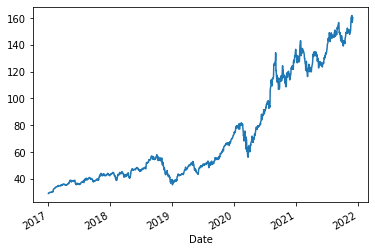

In [4]:
#@title 下載歷史價格

try:
    import yfinance as yf
except:
    !pip install lppls > log.txt
    !pip install yfinance > log.txt

asset_symbol = "tsla" #@param {type:"string"}

import yfinance as yf
stock = yf.Ticker(asset_symbol)

# get historical market data
data = yf.download("AAPL", start="2017-01-01", end="2021-11-30")
data.Close.plot()


( b < 0   )  -0.007410124978766468
(|c| < 1  )  0.001221431358881136
(0 < m < 1)  0.6237956233576016


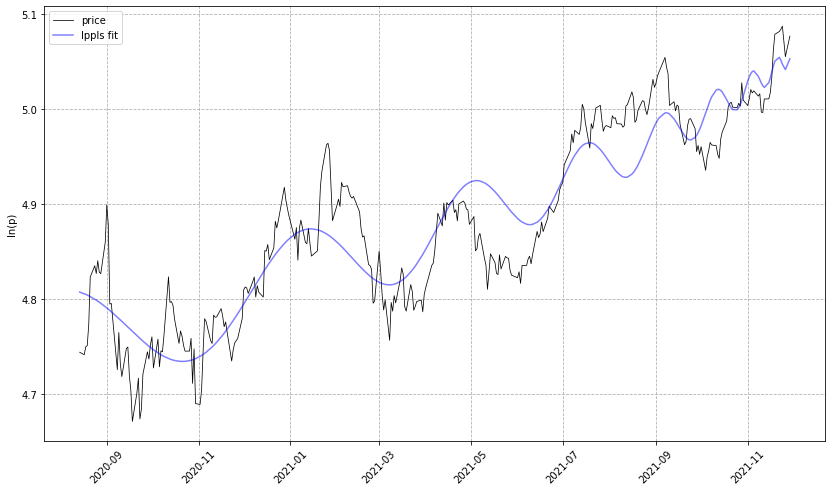

In [7]:
#@title LPPL 分析
variable_name = "2021-11-30" #@param {type:"date"}
ndates = 326 #@param {type:"slider", min:0, max:500, step:1}

from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

# read example dataset into df 
#data = data_loader.nasdaq_dotcom()

# convert time to ordinal

processing_data = data.loc[:variable_name].iloc[-ndates:].reset_index()
processing_data.Date = processing_data.Date.astype(str)

time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in processing_data['Date']]

# create list of observation data
price = np.log(processing_data['Close'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# visualize the fit
lppls_model.plot_fit()


import datetime
print('( b < 0   ) ', b)
print('(|c| < 1  ) ', c)
print('(0 < m < 1) ', m)

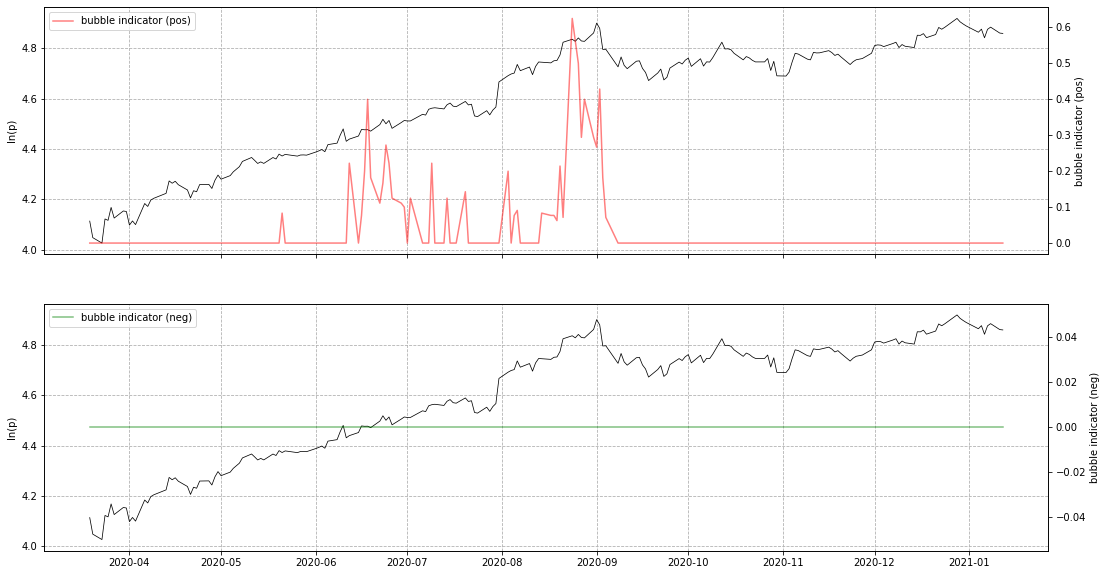

In [6]:
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=120, 
    smallest_window_size=30, 
    outer_increment=1, 
    inner_increment=5, 
    max_searches=25,
    # filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)